In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/exams.csv")

In [ ]:
df

gender race/ethnicity parental level of education         lunch  \
0      male        group C            some high school      standard   
1    female        group D          associate's degree      standard   
2      male        group B                some college  free/reduced   
3    female        group D                some college  free/reduced   
4      male        group D          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                some college      standard   
996    male        group C                some college      standard   
997  female        group A                 high school      standard   
998    male        group E                 high school      standard   
999    male        group D                 high school      standard   

    test preparation course  math score  reading score  writing score  \
0                      none          68             57             54   
1                      none          83             85             86   
2                      none          70             70             63   
3                      none          57             76             77   
4                      none          96             93             87   
..                      ...         ...            ...            ...   
995                    none          77             77             71   
996                    none          80             66             66   
997               completed          67             86             86   
998                    none          80             72             62   
999                    none          58             47             45   

     Attendance rate  % of Homework completed  
0                  0                       71  
1                 93                       67  
2                 59                       17  
3                 95                        8  
4                 95                       58  
..               ...                      ...  
995               74                       42  
996              100                       33  
997               98                       80  
998                3                      100  
999               67                       71  

[1000 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   Attendance rate              1000 non-null   int64 
 9   % of Homework completed      1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [ ]:
# Get the current column names
current_columns = df.columns.tolist()

# Add the missing column names to your new list
new_columns = ["gender","race/ethnicity","parental level of education","lunch","test preparation course","math_score","reading_score","writing_score"]

#Extend the new column list with the missing columns
new_columns.extend(current_columns[len(new_columns):])

# Assign the extended list of column names to the DataFrame
df.columns = new_columns

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math_score', 'reading_score',
       'writing_score', 'Attendance rate', '% of Homework completed'],
      dtype='object')

In [ ]:
numeric_columns = ['math_score', 'reading_score', 'writing_score']
non_numeric_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math_score                     0
reading_score                  0
writing_score                  0
Attendance rate                0
% of Homework completed        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(subset = None, keep = "first",inplace = True,ignore_index = False)

In [ ]:
df.duplicated().sum()

0

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns].describe()

math_score  reading_score  writing_score  Attendance rate  \
count  1000.000000    1000.000000    1000.000000      1000.000000   
mean     67.810000      70.382000      69.140000        51.297000   
std      15.250196      14.107413      15.025917        29.843985   
min      15.000000      25.000000      15.000000         0.000000   
25%      58.000000      61.000000      59.000000        25.000000   
50%      68.000000      70.500000      70.000000        51.000000   
75%      79.250000      80.000000      80.000000        77.000000   
max     100.000000     100.000000     100.000000       100.000000   

       % of Homework completed  
count              1000.000000  
mean                 51.110000  
std                  29.980573  
min                   0.000000  
25%                  25.000000  
50%                  53.000000  
75%                  77.000000  
max                 100.000000

In [ ]:
df[non_numeric_columns].describe(include = object)

gender race/ethnicity parental level of education     lunch  \
count    1000           1000                        1000      1000   
unique      2              5                           6         2   
top      male        group C                some college  standard   
freq      508            323                         224       660   

       test preparation course  
count                     1000  
unique                       2  
top                       none  
freq                       656

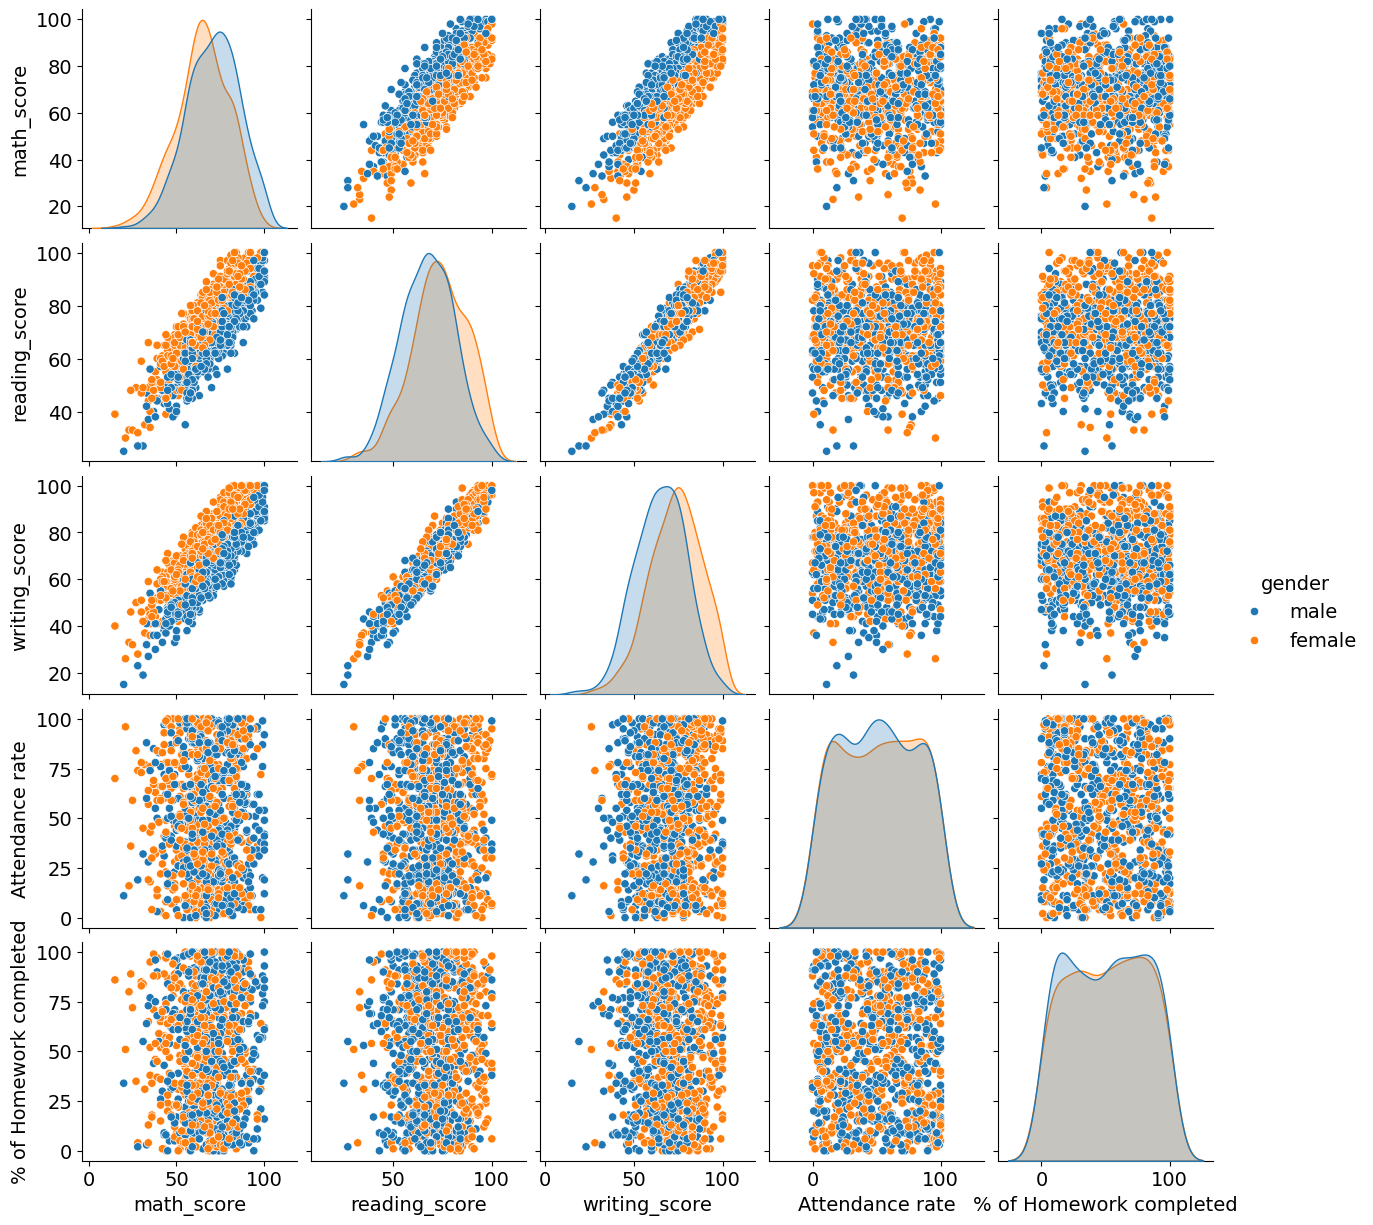

In [ ]:
sns.pairplot(df, hue = "gender" )
plt.show()

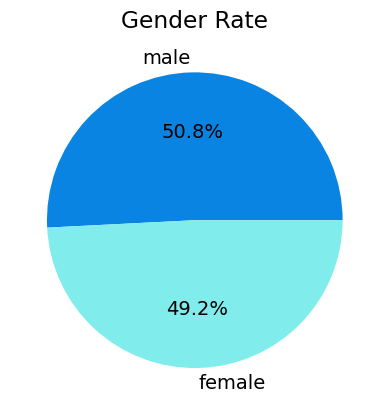

In [ ]:
plt.pie(df['gender'].value_counts(), labels = ['male', 'female'],autopct='%1.1f%%', colors = ("#0984e3","#81ecec"))
plt.title('Gender Rate')
plt.show()

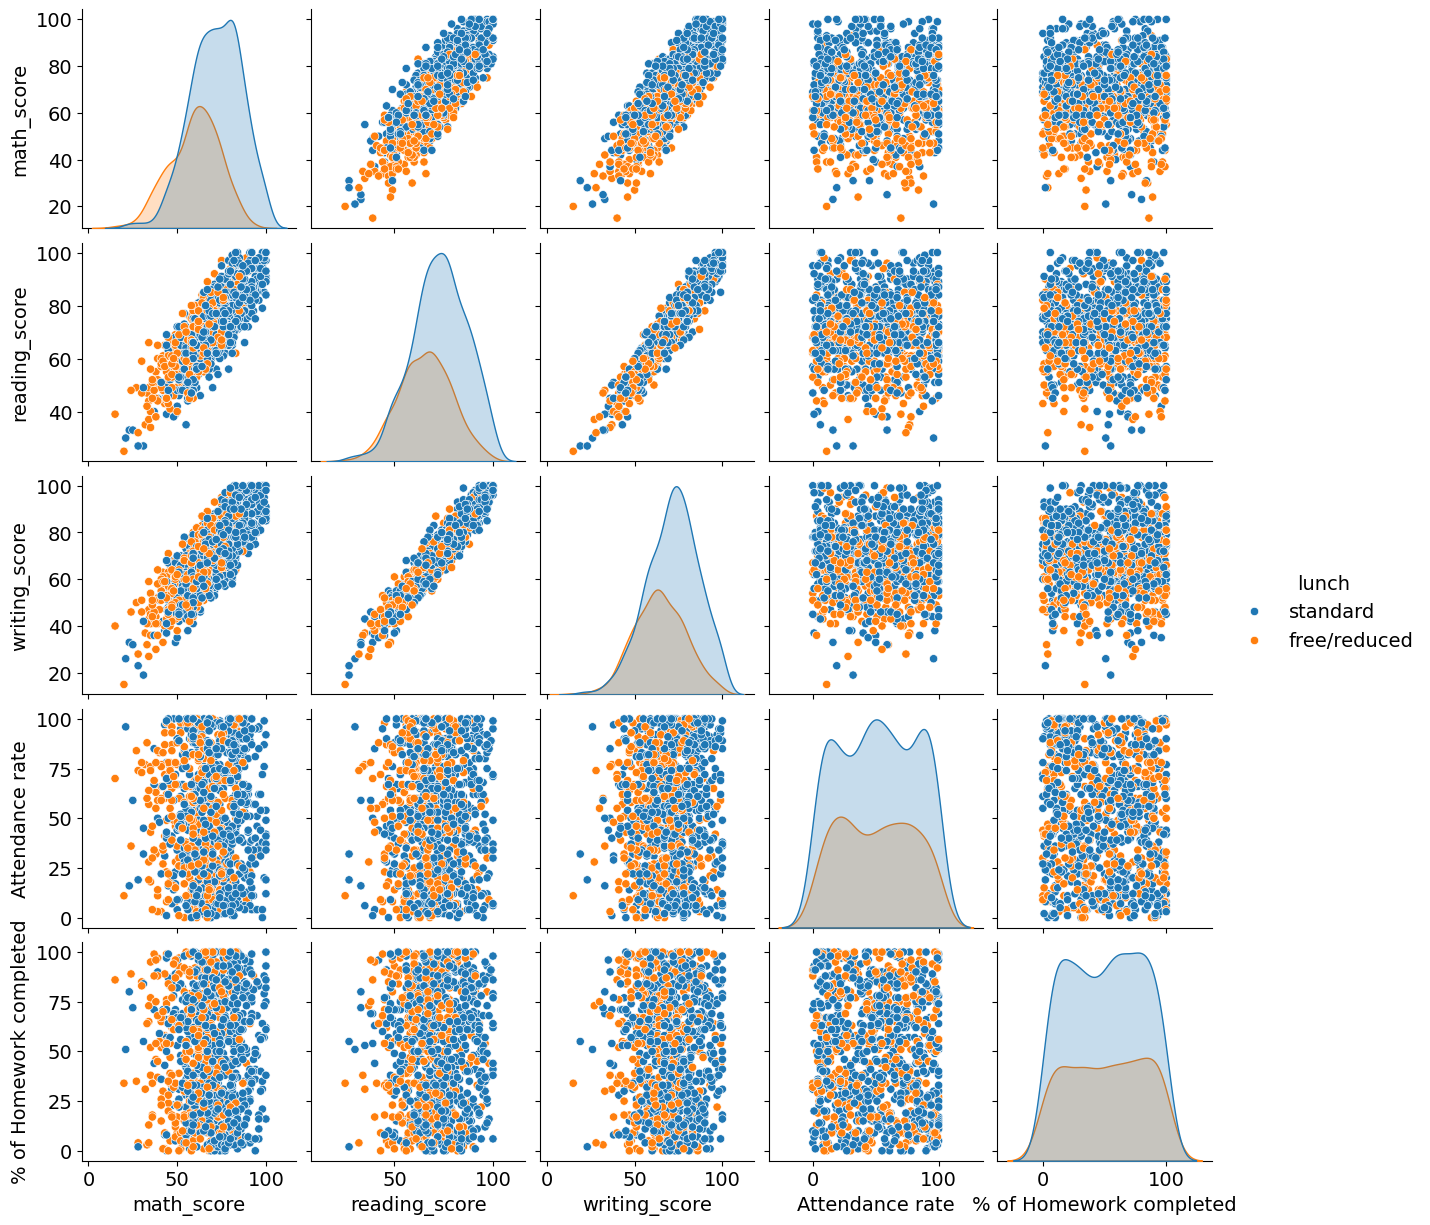

In [ ]:
sns.pairplot(df, hue = "lunch" )
plt.show()

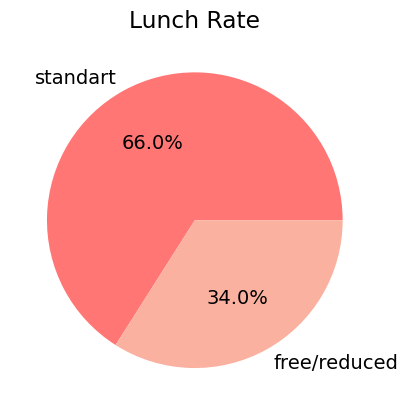

In [ ]:
plt.pie(df['lunch'].value_counts(), labels = ['standart', 'free/reduced'],colors =('#ff7675','#fab1a0'),autopct='%1.1f%%')
plt.title('Lunch Rate')
plt.show()

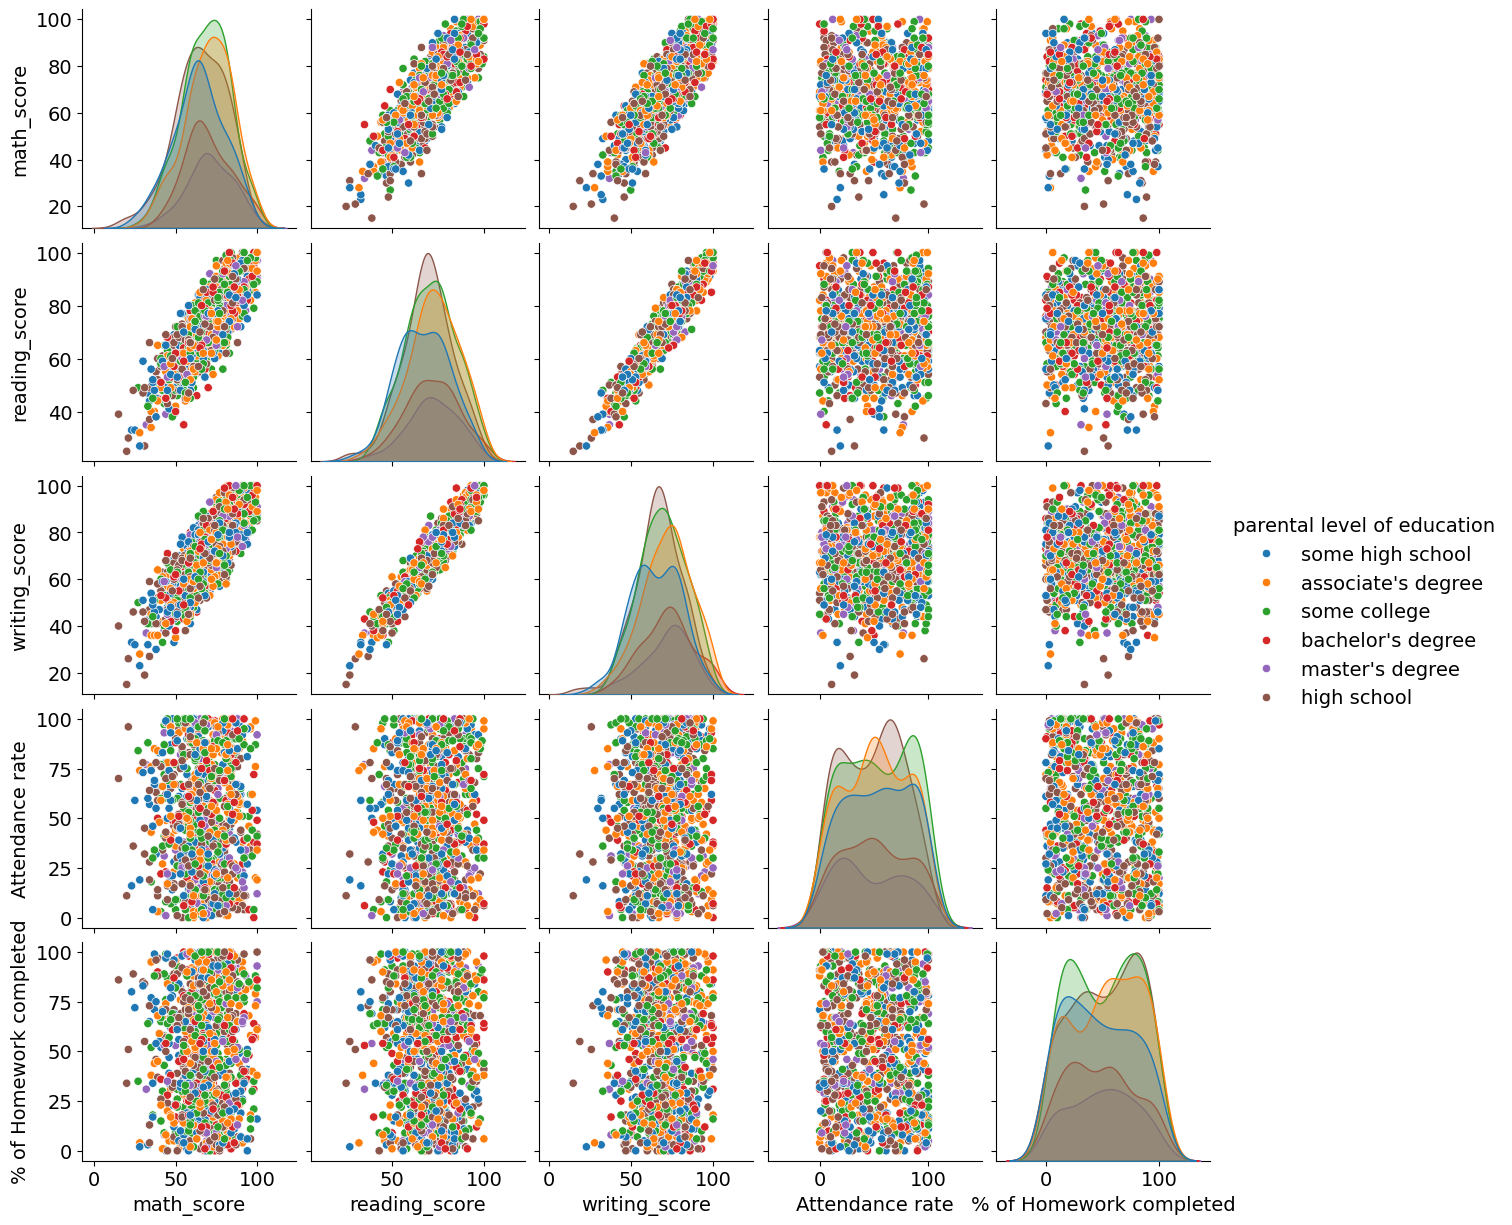

In [ ]:
sns.pairplot(df, hue = "parental level of education")
plt.show()

In [ ]:
df[numeric_columns].describe()

math_score  reading_score  writing_score  Attendance rate  \
count  1000.000000    1000.000000    1000.000000      1000.000000   
mean     67.810000      70.382000      69.140000        51.297000   
std      15.250196      14.107413      15.025917        29.843985   
min      15.000000      25.000000      15.000000         0.000000   
25%      58.000000      61.000000      59.000000        25.000000   
50%      68.000000      70.500000      70.000000        51.000000   
75%      79.250000      80.000000      80.000000        77.000000   
max     100.000000     100.000000     100.000000       100.000000   

       % of Homework completed  
count              1000.000000  
mean                 51.110000  
std                  29.980573  
min                   0.000000  
25%                  25.000000  
50%                  53.000000  
75%                  77.000000  
max                 100.000000

In [ ]:
def mathsuccess(x):
    if (x > 80) :
        return("succesful")

    elif(66 < x <80) :
        return("to improve")
    else:
        return("unsuccessful")

# Replace 'math_score' with the correct column name if it was modified
df["math_success_scala"] = df['math_score'].apply(mathsuccess)  # Assuming 'math score' is the actual column name
print(df)

     gender race/ethnicity parental level of education         lunch  \
0      male        group C            some high school      standard   
1    female        group D          associate's degree      standard   
2      male        group B                some college  free/reduced   
3    female        group D                some college  free/reduced   
4      male        group D          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                some college      standard   
996    male        group C                some college      standard   
997  female        group A                 high school      standard   
998    male        group E                 high school      standard   
999    male        group D                 high school      standard   

    test preparation course  math_score  reading_score  writing_score  \
0                      none          68             57        

In [ ]:
def writingsuccess(x):
    if (x > 80) :
        return("succesful")

    elif(67 < x <80) :
        return("to improve")
    else:
        return("unsuccessful")

# Replace 'writing_score' with the actual column name if it's different
df["writing_success_scala"] = df.apply(lambda x: writingsuccess(x["writing_score"]), axis = 1)  # Assuming 'writing score' is the actual column name
print(df)

     gender race/ethnicity parental level of education         lunch  \
0      male        group C            some high school      standard   
1    female        group D          associate's degree      standard   
2      male        group B                some college  free/reduced   
3    female        group D                some college  free/reduced   
4      male        group D          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                some college      standard   
996    male        group C                some college      standard   
997  female        group A                 high school      standard   
998    male        group E                 high school      standard   
999    male        group D                 high school      standard   

    test preparation course  math_score  reading_score  writing_score  \
0                      none          68             57        

In [ ]:
def readingsuccess(x):
    if (x > 80) :
        return("succesful")

    elif(69 < x <80) :
        return("to improve")
    else:
        return("unsuccessful")

# Access the column using df['reading score'] instead of df['reading_score']
df["reading_success_scala"] = df['reading_score'].apply(readingsuccess)
print(df)

     gender race/ethnicity parental level of education         lunch  \
0      male        group C            some high school      standard   
1    female        group D          associate's degree      standard   
2      male        group B                some college  free/reduced   
3    female        group D                some college  free/reduced   
4      male        group D          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                some college      standard   
996    male        group C                some college      standard   
997  female        group A                 high school      standard   
998    male        group E                 high school      standard   
999    male        group D                 high school      standard   

    test preparation course  math_score  reading_score  writing_score  \
0                      none          68             57        

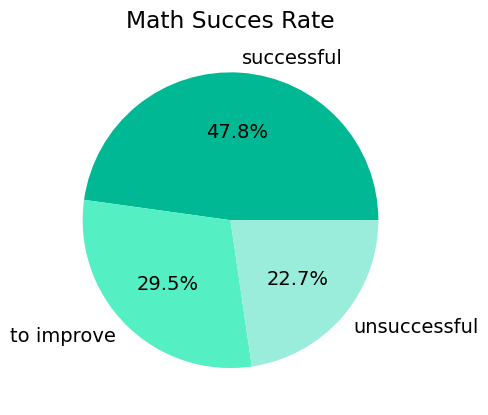

In [ ]:
plt.pie(df['math_success_scala'].value_counts(), labels = ['successful', 'to improve','unsuccessful'],colors =('#00b894','#55efc4','#9AECDB'),autopct='%1.1f%%')
plt.title('Math Succes Rate')
plt.show()

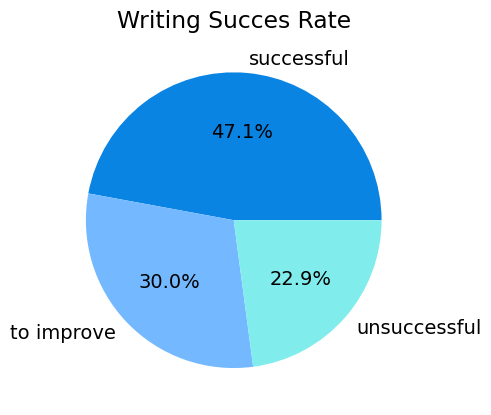

In [ ]:
plt.pie(df['writing_success_scala'].value_counts(), labels = ['successful', 'to improve','unsuccessful'],colors =('#0984e3','#74b9ff','#81ecec'),autopct='%1.1f%%')
plt.title('Writing Succes Rate')
plt.show()

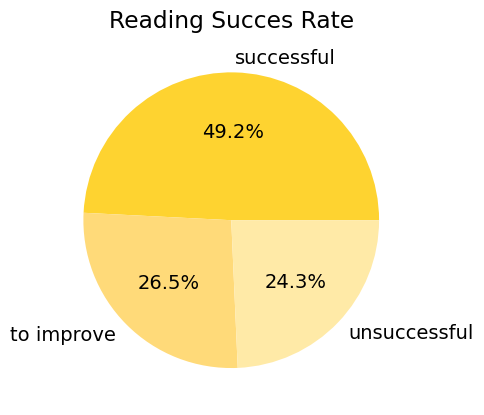

In [ ]:
plt.pie(df['reading_success_scala'].value_counts(), labels = ['successful', 'to improve','unsuccessful'],colors =('#fed330','#ffda79','#ffeaa7'),autopct='%1.1f%%')
plt.title('Reading Succes Rate')
plt.show()

Text(0.5, 1.0, 'Math Score and writing Score - Lunch')

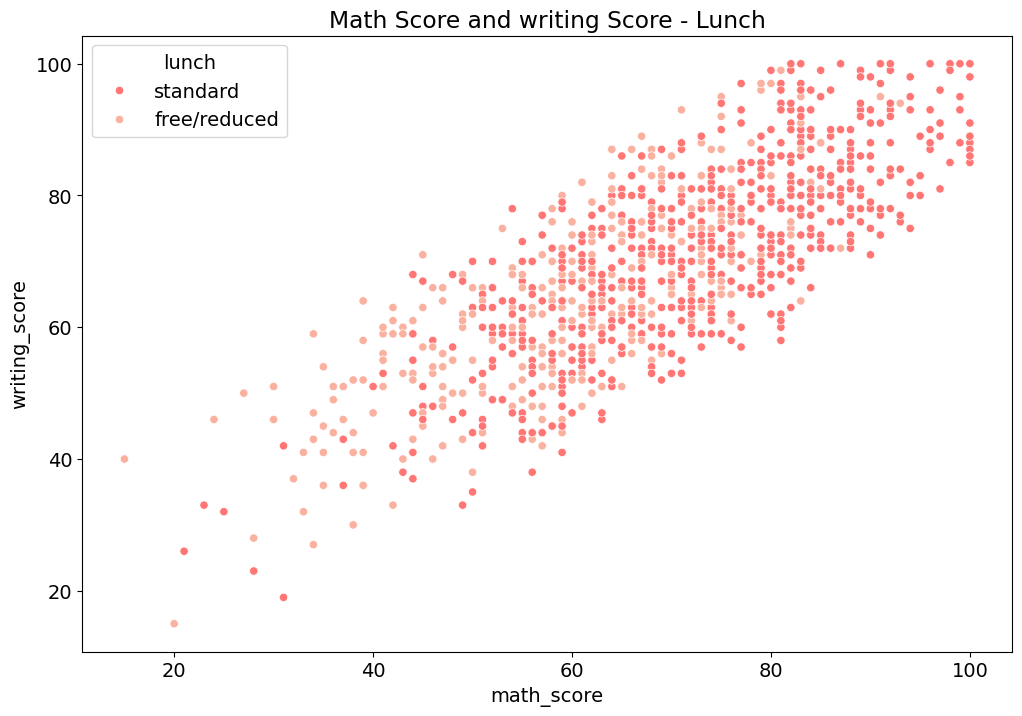

In [ ]:
plt.figure(figsize=(12,8))
# The column name is likely 'writing score' with a space, not 'writing_score'
sns.scatterplot(data=df, x="math_score", y="writing_score", hue="lunch", palette=("#ff7675", "#fab1a0"))
plt.title("Math Score and writing Score - Lunch")

Text(0.5, 1.0, 'Writing Score and Reading Score - parental level of education')

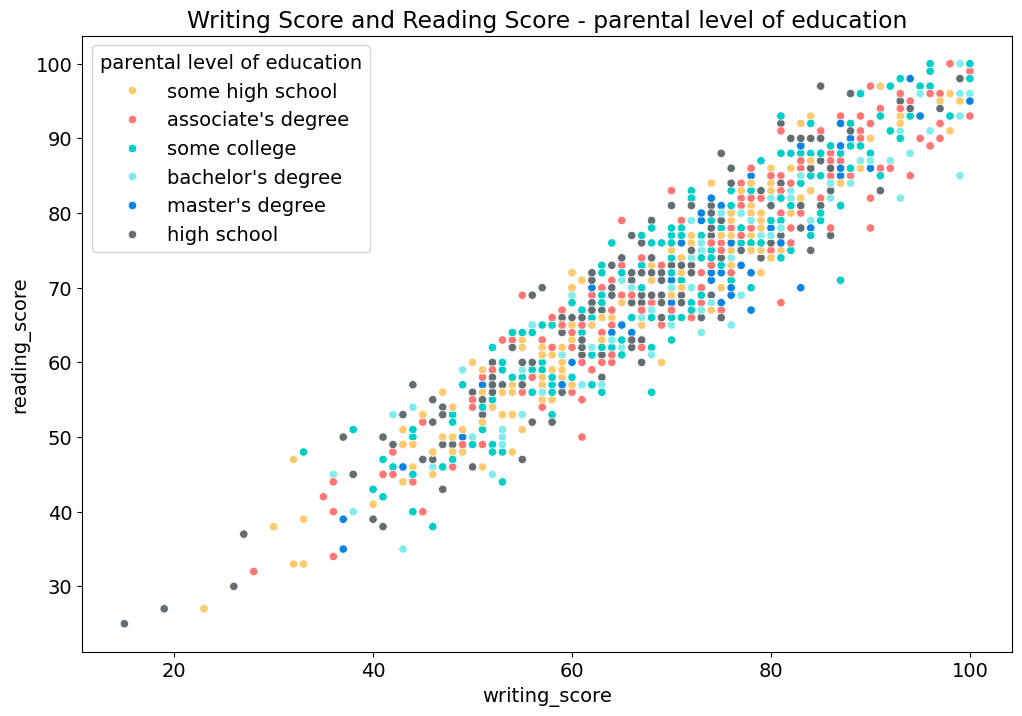

In [ ]:
plt.figure(figsize=(12,8))
# Use 'writing score' instead of 'writing_score' for the x-axis
# The 'y' column should be 'reading score', not 'reading_score'
sns.scatterplot(data=df, x="writing_score", y="reading_score", hue="parental level of education", palette=("#fdcb6e", "#ff7675", "#00cec9", "#81ecec", "#0984e3", "#636e72"))
plt.title("Writing Score and Reading Score - parental level of education")

Text(0.5, 1.0, 'Math Score and Writing Score - parental level of education')

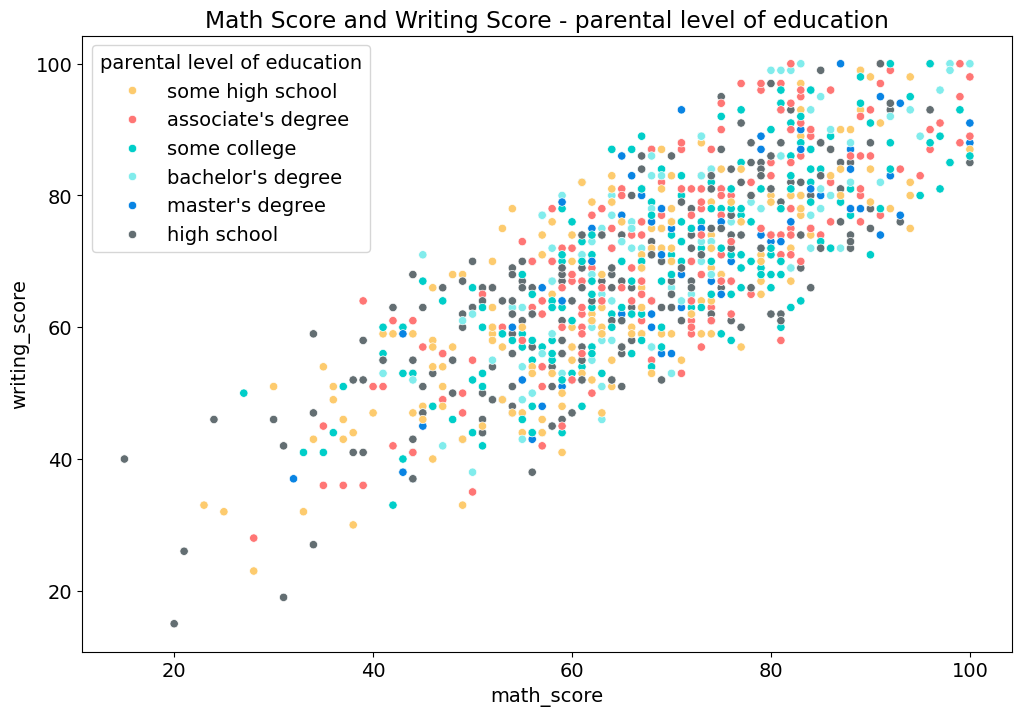

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="math_score",y ="writing_score" ,hue = "parental level of education",palette =("#fdcb6e","#ff7675","#00cec9","#81ecec","#0984e3","#636e72"))
plt.title("Math Score and Writing Score - parental level of education")

In [ ]:
df[numeric_columns]

math_score  reading_score  writing_score  Attendance rate  \
0            68             57             54                0   
1            83             85             86               93   
2            70             70             63               59   
3            57             76             77               95   
4            96             93             87               95   
..          ...            ...            ...              ...   
995          77             77             71               74   
996          80             66             66              100   
997          67             86             86               98   
998          80             72             62                3   
999          58             47             45               67   

     % of Homework completed  
0                         71  
1                         67  
2                         17  
3                          8  
4                         58  
..                       ...  
995                       42  
996                       33  
997                       80  
998                      100  
999                       71  

[1000 rows x 5 columns]

<ipython-input-33-007955f1e1b0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[i], color = "#0984e3")


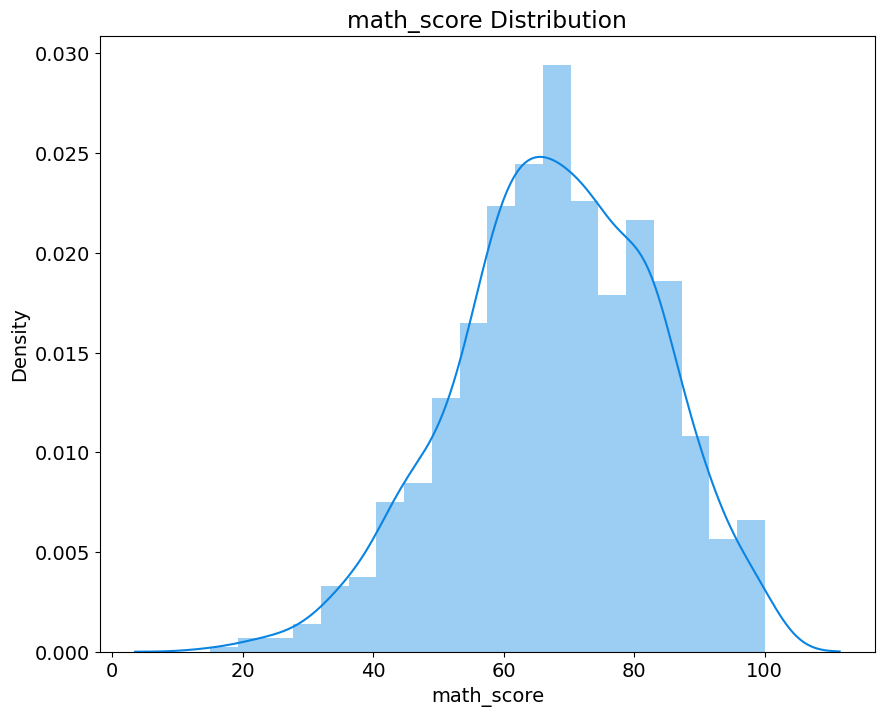

<ipython-input-33-007955f1e1b0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[i], color = "#0984e3")


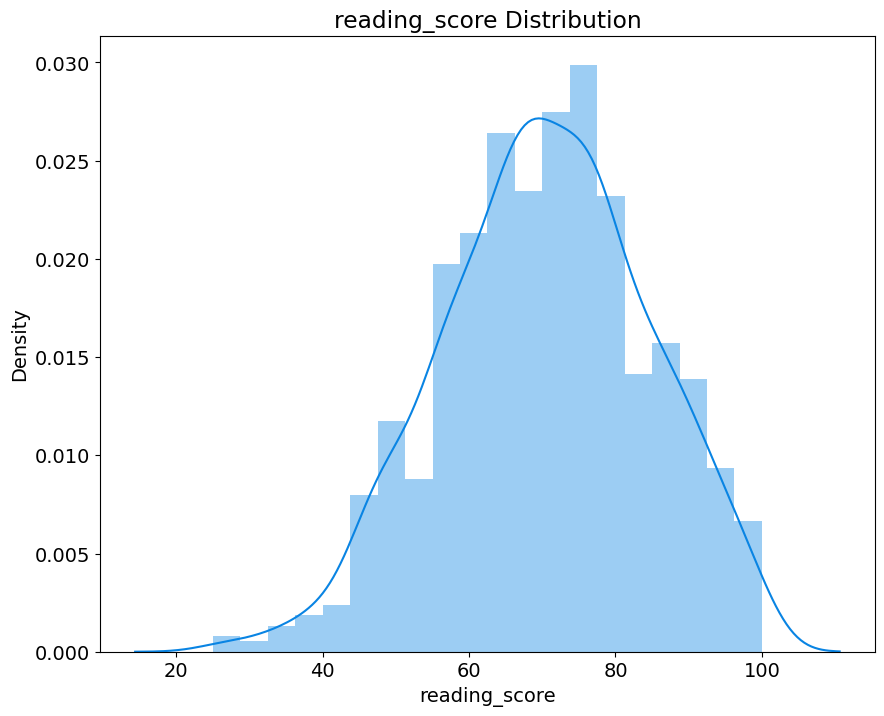

<ipython-input-33-007955f1e1b0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[i], color = "#0984e3")


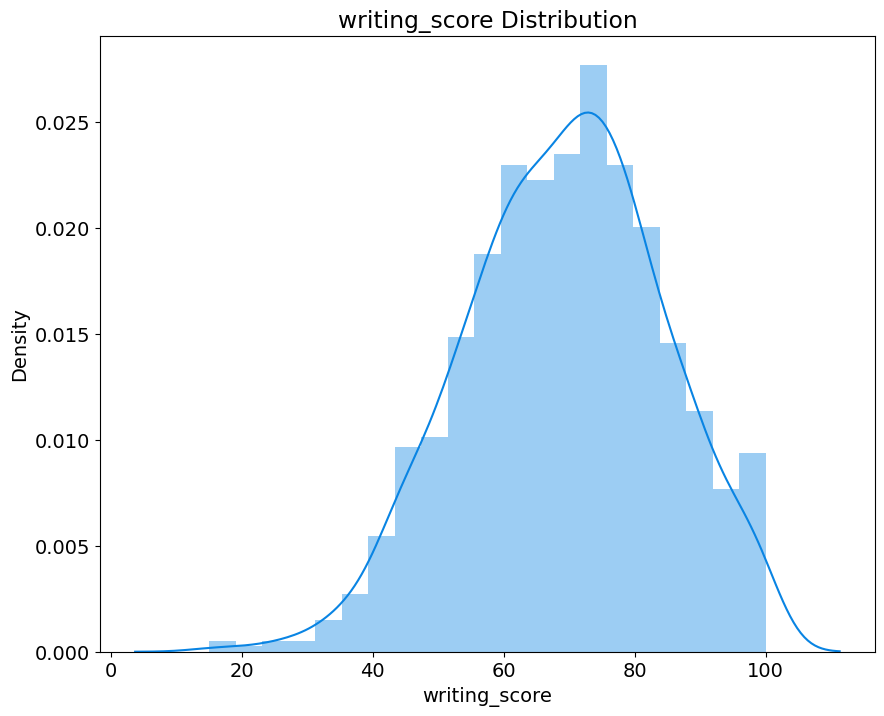

<ipython-input-33-007955f1e1b0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[i], color = "#0984e3")


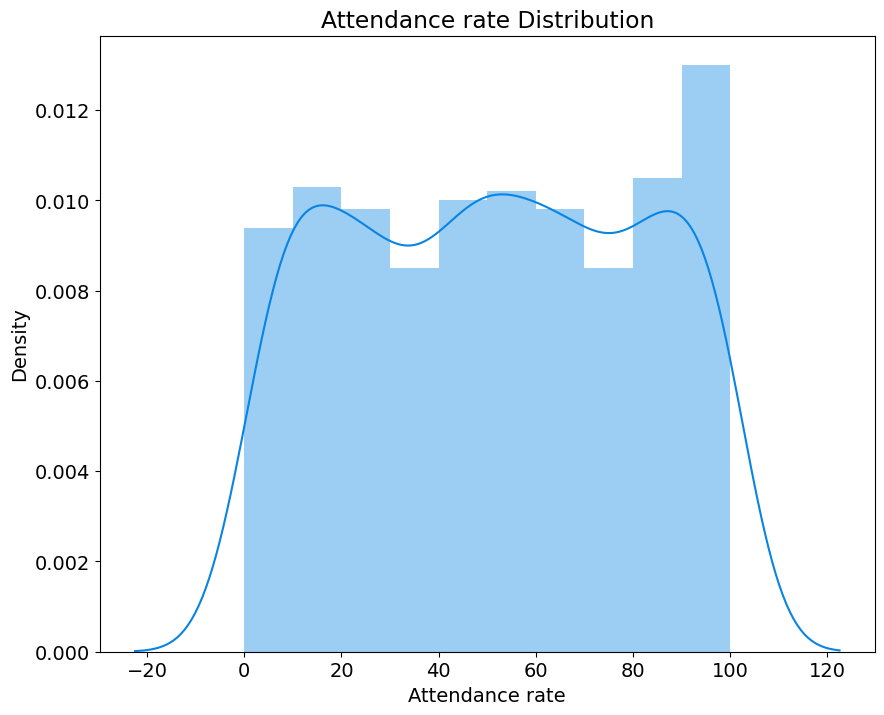

<ipython-input-33-007955f1e1b0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[i], color = "#0984e3")


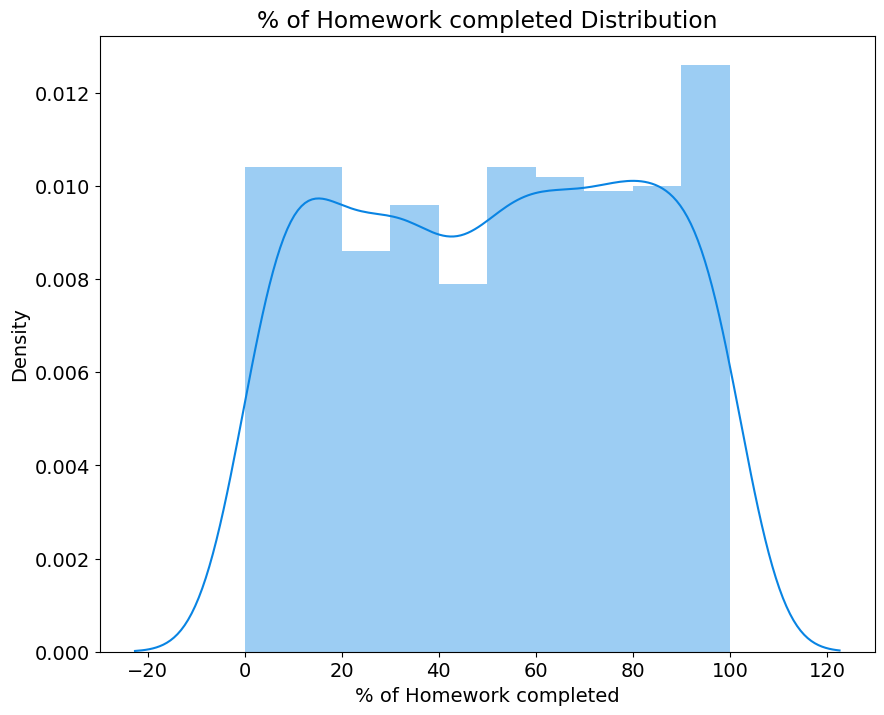

In [ ]:
for i in numeric_columns:
  fig,ax = plt.subplots(figsize=(10,8))
  ax = sns.distplot(df[i], color = "#0984e3")
  ax.set_title(i+' Distribution')
  plt.show()

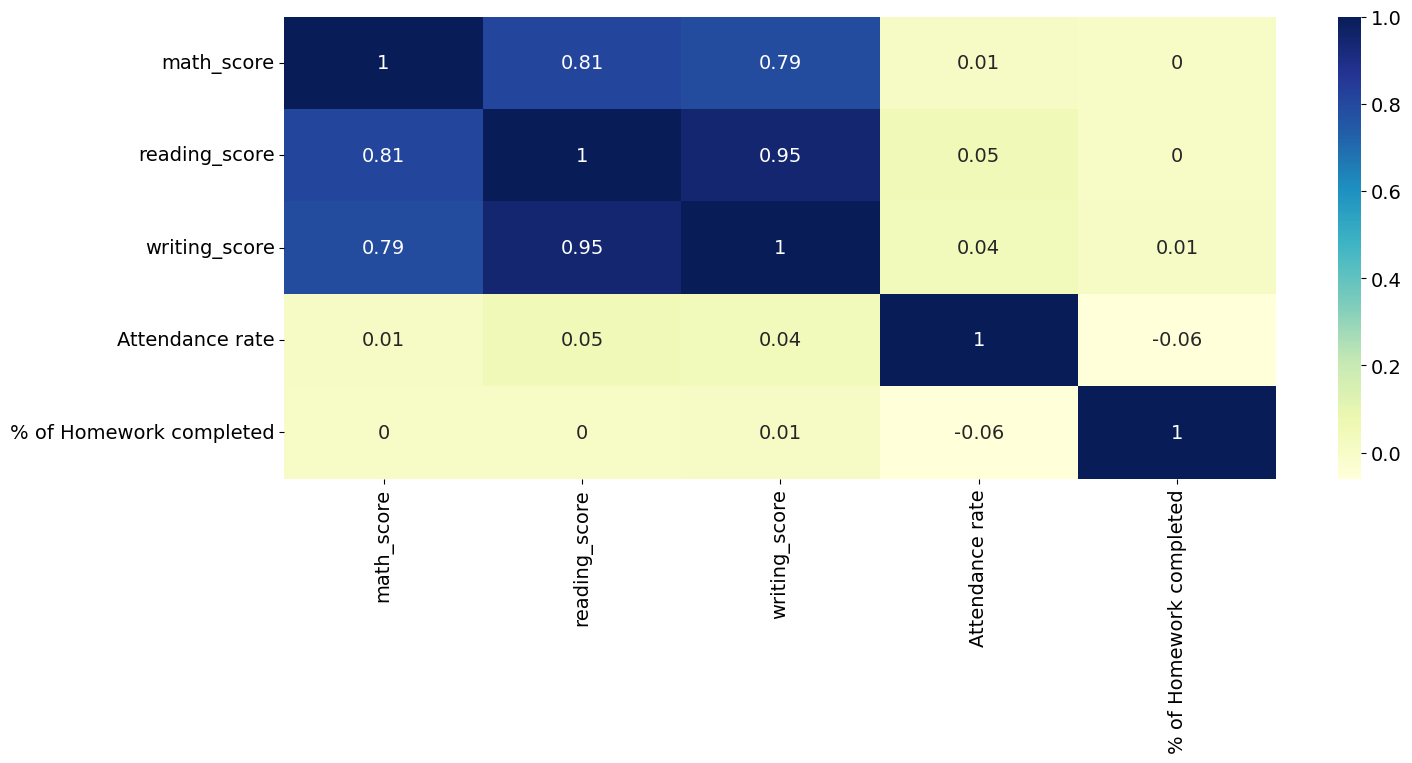

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df[numeric_columns].corr().round(2), cmap="YlGnBu", annot=True)

plt.show()

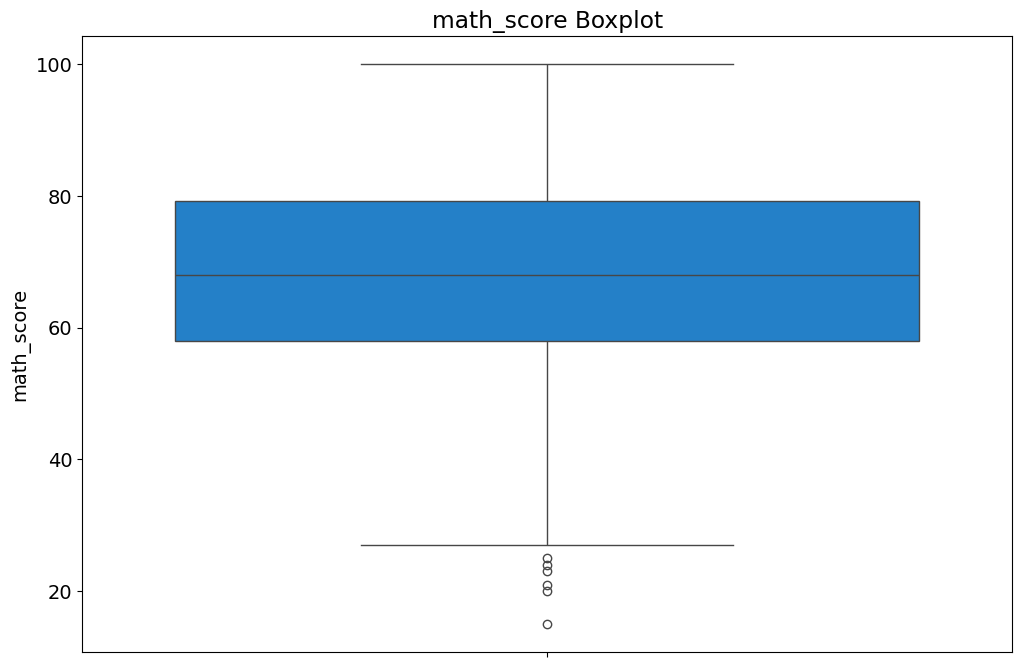

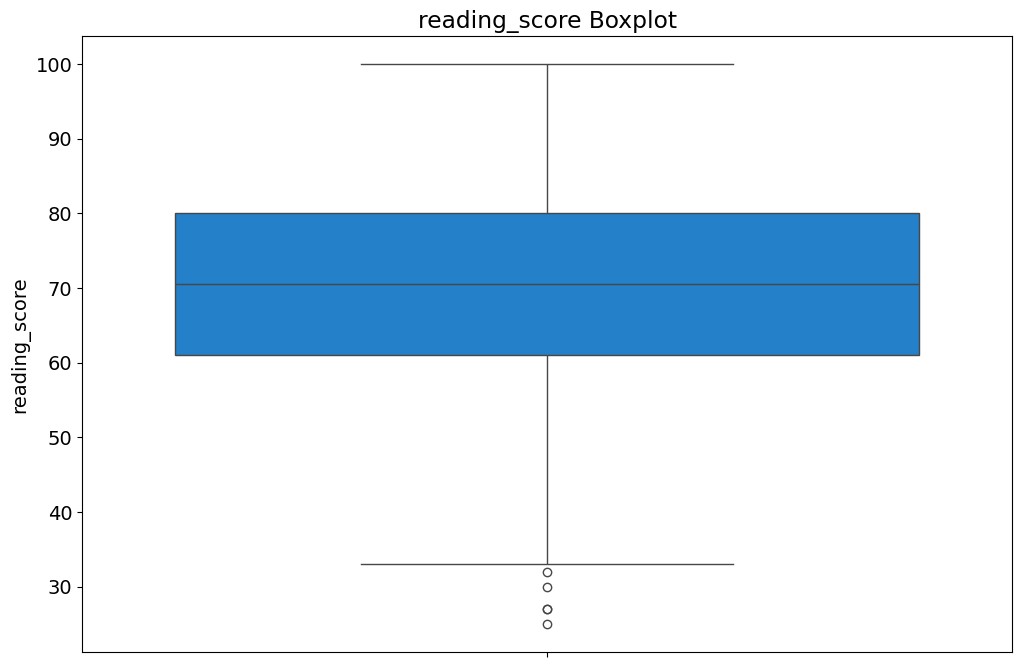

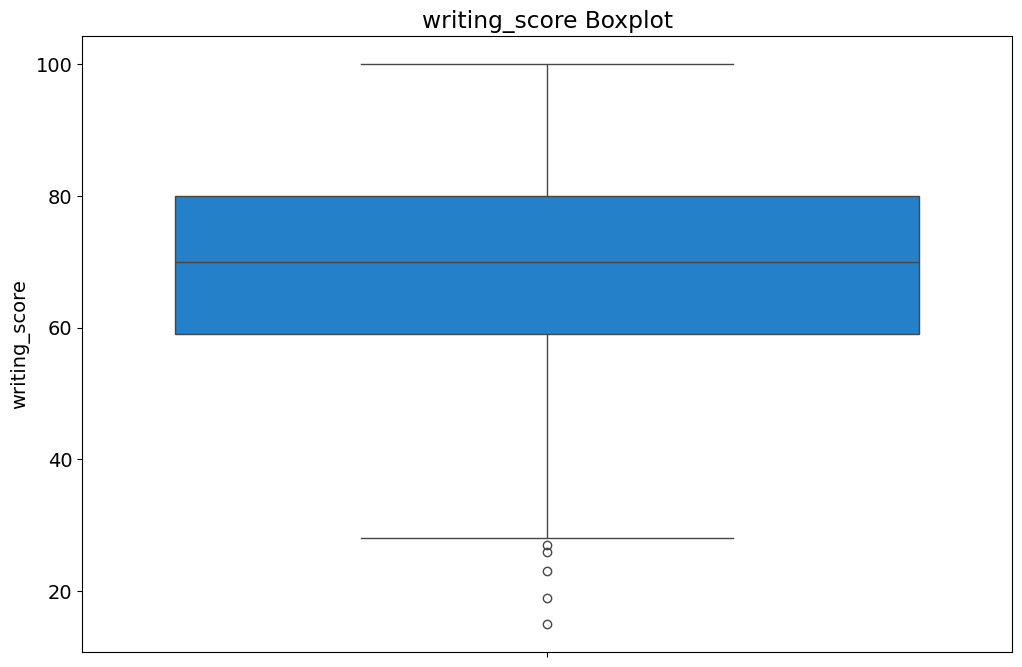

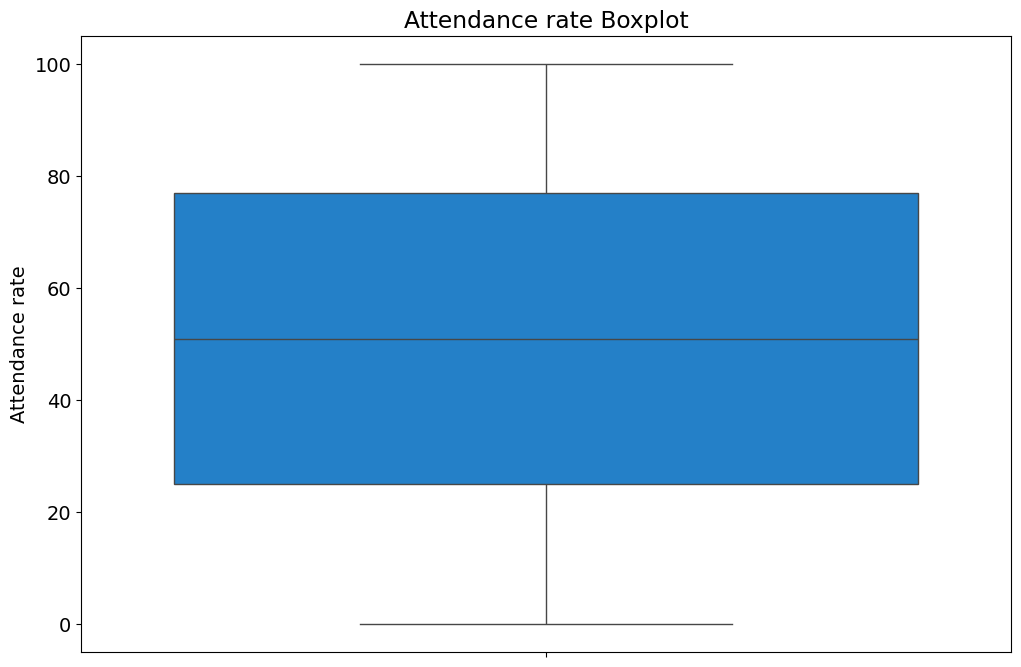

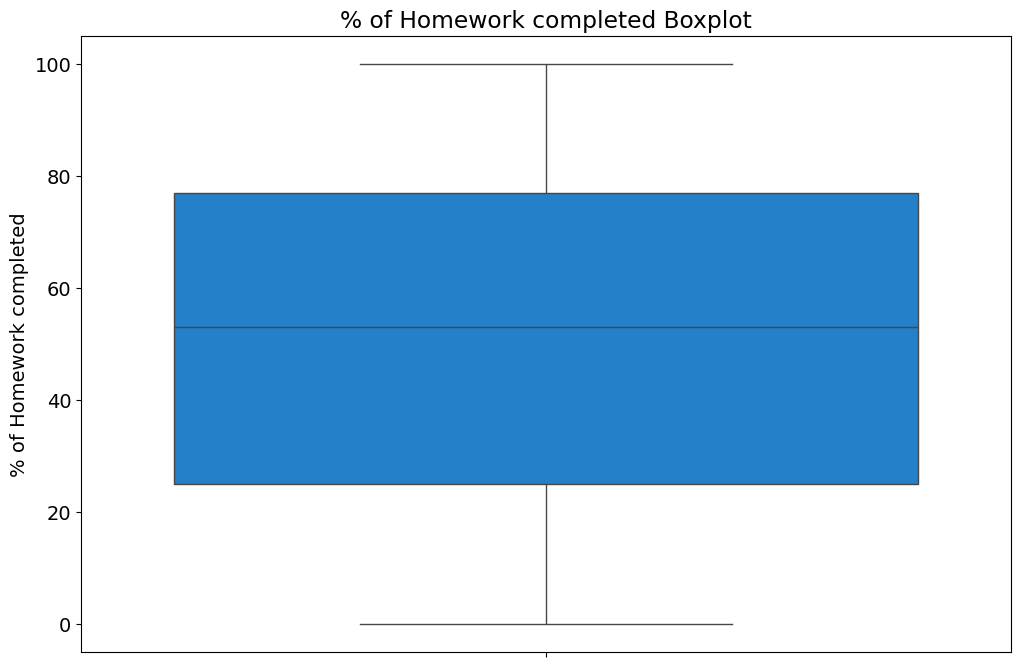

In [ ]:
for i in numeric_columns:
 fig,ax = plt.subplots(figsize=(12,8))
 ax = sns.boxplot(data = df[i], color = "#0984e3")
 ax.set_title(i+ ' ' + 'Boxplot')
 plt.show()

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math_score                     0
reading_score                  0
writing_score                  0
Attendance rate                0
% of Homework completed        0
math_success_scala             0
reading_success_scala          0
writing_success_scala          0
dtype: int64

In [ ]:
df[numeric_columns].describe()

math_score  reading_score  writing_score  Attendance rate  \
count  1000.000000    1000.000000    1000.000000      1000.000000   
mean     67.810000      70.382000      69.140000        51.297000   
std      15.250196      14.107413      15.025917        29.843985   
min      15.000000      25.000000      15.000000         0.000000   
25%      58.000000      61.000000      59.000000        25.000000   
50%      68.000000      70.500000      70.000000        51.000000   
75%      79.250000      80.000000      80.000000        77.000000   
max     100.000000     100.000000     100.000000       100.000000   

       % of Homework completed  
count              1000.000000  
mean                 51.110000  
std                  29.980573  
min                   0.000000  
25%                  25.000000  
50%                  53.000000  
75%                  77.000000  
max                 100.000000

In [ ]:
df

gender race/ethnicity parental level of education         lunch  \
0      male        group C            some high school      standard   
1    female        group D          associate's degree      standard   
2      male        group B                some college  free/reduced   
3    female        group D                some college  free/reduced   
4      male        group D          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                some college      standard   
996    male        group C                some college      standard   
997  female        group A                 high school      standard   
998    male        group E                 high school      standard   
999    male        group D                 high school      standard   

    test preparation course  math_score  reading_score  writing_score  \
0                      none          68             57             54   
1                      none          83             85             86   
2                      none          70             70             63   
3                      none          57             76             77   
4                      none          96             93             87   
..                      ...         ...            ...            ...   
995                    none          77             77             71   
996                    none          80             66             66   
997               completed          67             86             86   
998                    none          80             72             62   
999                    none          58             47             45   

     Attendance rate  % of Homework completed math_success_scala  \
0                  0                       71         to improve   
1                 93                       67          succesful   
2                 59                       17         to improve   
3                 95                        8       unsuccessful   
4                 95                       58          succesful   
..               ...                      ...                ...   
995               74                       42         to improve   
996              100                       33       unsuccessful   
997               98                       80         to improve   
998                3                      100       unsuccessful   
999               67                       71       unsuccessful   

    reading_success_scala writing_success_scala  
0            unsuccessful          unsuccessful  
1               succesful             succesful  
2              to improve          unsuccessful  
3              to improve            to improve  
4               succesful             succesful  
..                    ...                   ...  
995            to improve            to improve  
996          unsuccessful          unsuccessful  
997             succesful             succesful  
998            to improve          unsuccessful  
999          unsuccessful          unsuccessful  

[1000 rows x 13 columns]

In [ ]:
df.loc[:,'gender'] = [1 if each == 'female' else 0 for each in df.loc[:,'gender'] ]
Labels = df.loc[:,'gender']

x = df.drop(['gender'],axis = 1)

In [ ]:
df

gender race/ethnicity parental level of education         lunch  \
0        0        group C            some high school      standard   
1        1        group D          associate's degree      standard   
2        0        group B                some college  free/reduced   
3        1        group D                some college  free/reduced   
4        0        group D          associate's degree      standard   
..     ...            ...                         ...           ...   
995      0        group C                some college      standard   
996      0        group C                some college      standard   
997      1        group A                 high school      standard   
998      0        group E                 high school      standard   
999      0        group D                 high school      standard   

    test preparation course  math_score  reading_score  writing_score  \
0                      none          68             57             54   
1                      none          83             85             86   
2                      none          70             70             63   
3                      none          57             76             77   
4                      none          96             93             87   
..                      ...         ...            ...            ...   
995                    none          77             77             71   
996                    none          80             66             66   
997               completed          67             86             86   
998                    none          80             72             62   
999                    none          58             47             45   

     Attendance rate  % of Homework completed math_success_scala  \
0                  0                       71         to improve   
1                 93                       67          succesful   
2                 59                       17         to improve   
3                 95                        8       unsuccessful   
4                 95                       58          succesful   
..               ...                      ...                ...   
995               74                       42         to improve   
996              100                       33       unsuccessful   
997               98                       80         to improve   
998                3                      100       unsuccessful   
999               67                       71       unsuccessful   

    reading_success_scala writing_success_scala  
0            unsuccessful          unsuccessful  
1               succesful             succesful  
2              to improve          unsuccessful  
3              to improve            to improve  
4               succesful             succesful  
..                    ...                   ...  
995            to improve            to improve  
996          unsuccessful          unsuccessful  
997             succesful             succesful  
998            to improve          unsuccessful  
999          unsuccessful          unsuccessful  

[1000 rows x 13 columns]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
X = df[["math_score","reading_score","writing_score"]]  # Use actual column names from your DataFrame
y = df["gender"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=21, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
# Convert y_train to a numerical data type, for example, int:
y_train = y_train.astype(int)
# Fit the model again:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training data only
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
# Convert y_test to a numerical data type (int):
y_test = y_test.astype(int)

train_accuracies = []
test_accuracies = []
neighbors = np.arange(1, 20)

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))

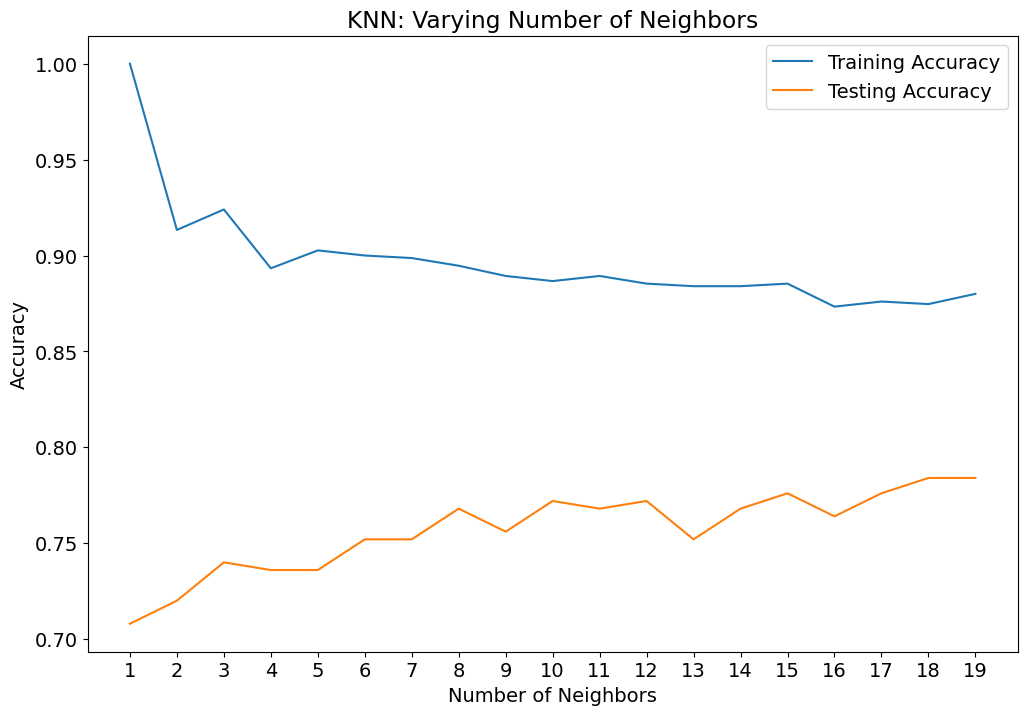

Best accuracy is 0.784 with K = 18


In [ ]:
plt.figure(figsize=(12, 8))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies, label="Training Accuracy")
plt.plot(neighbors, test_accuracies, label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracies),1+test_accuracies.index(np.max(test_accuracies))))

In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors=11)
knn_tuned.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
train_score = knn_tuned.score(X_train, y_train)
print(train_score)
test_score = knn_tuned.score(X_test, y_test)
print(test_score)

0.8893333333333333
0.768


In [ ]:
X

math_score  reading_score  writing_score
0            68             57             54
1            83             85             86
2            70             70             63
3            57             76             77
4            96             93             87
..          ...            ...            ...
995          77             77             71
996          80             66             66
997          67             86             86
998          80             72             62
999          58             47             45

[1000 rows x 3 columns]

In [ ]:
new_Students_scores = pd.DataFrame([[45,30,20],[85,100,95]], columns = X_train.columns ,index = ["student_1","student_2"])

In [ ]:
new_Students_scores

0    1   2
student_1  45   30  20
student_2  85  100  95

In [ ]:
X_new = np.array([[45,30,20],[85,100,95]])
print(X_new.shape)

(2, 3)


In [ ]:
predictions = knn_tuned.predict(X_new)
print('Predictions: {}'.format(predictions))

Predictions: [0 0]


In [ ]:
# Define the target variable (student performance category)
# Assume 'math_success_scala' represents performance
y = df["math_success_scala"]

# Define feature variables
X = df.drop(["math_success_scala", 'writing_success_scala', 'reading_success_scala'], axis=1)  # Drop target variables and other performance category

# Display feature set
X.head()

gender race/ethnicity parental level of education         lunch  \
0      0        group C            some high school      standard   
1      1        group D          associate's degree      standard   
2      0        group B                some college  free/reduced   
3      1        group D                some college  free/reduced   
4      0        group D          associate's degree      standard   

  test preparation course  math_score  reading_score  writing_score  \
0                    none          68             57             54   
1                    none          83             85             86   
2                    none          70             70             63   
3                    none          57             76             77   
4                    none          96             93             87   

   Attendance rate  % of Homework completed  
0                0                       71  
1               93                       67  
2               59                       17  
3               95                        8  
4               95                       58

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Print shapes of training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((750, 10), (250, 10), (750,), (250,))

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Initialize models
models = {
    "Logistic Regression": make_pipeline(
        ColumnTransformer(
            transformers=[
                ('num', 'passthrough', X_train.select_dtypes(include=np.number).columns.tolist()),
                ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), X_train.select_dtypes(include=object).columns.tolist()),
            ]
        ),
        LogisticRegression(max_iter=500)
    ),
    "Random Forest": make_pipeline(
        ColumnTransformer(
            transformers=[
                ('num', 'passthrough', X_train.select_dtypes(include=np.number).columns.tolist()),
                ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), X_train.select_dtypes(include=object).columns.tolist()),
            ]
        ),
        RandomForestClassifier(n_estimators=100, random_state=42)
    ),
    "XGBoost": make_pipeline(
        ColumnTransformer(
            transformers=[
                ('num', 'passthrough', X_train.select_dtypes(include=np.number).columns.tolist()),
                ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), X_train.select_dtypes(include=object).columns.tolist()),
            ]
        ),
        XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    )
}

# Train models and store accuracy
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict on test set
    acc = accuracy_score(y_test, y_pred)  # Compute accuracy
    model_results[name] = acc  # Store result

    print(f"Model: {name}\n")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Display accuracy comparison
model_results




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        57
           1       0.84      0.78      0.81        74
           2       0.92      0.97      0.94       119

    accuracy                           0.89       250
   macro avg       0.88      0.87      0.87       250
weighted avg       0.89      0.89      0.89       250

--------------------------------------------------
Model: Random Forest

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       0.97      1.00      0.99        74
           2       1.00      0.97      0.99       119

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

--------------------------------------------------
Model: XGBoost

              precision    recall  f1-score   support

           0   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:04:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'Logistic Regression': 0.888, 'Random Forest': 0.988, 'XGBoost': 1.0}

In [ ]:
# Select the model with the highest accuracy
best_model_name = max(model_results, key=model_results.get)
best_model = models[best_model_name]

print(f"Best performing model: {best_model_name} with accuracy {model_results[best_model_name]:.4f}")


Best performing model: XGBoost with accuracy 1.0000


In [ ]:
def predict_performance_and_feedback(math, reading, writing, gender, race, parental_edu, lunch, test_prep):
    # Prepare input data
    input_data = pd.DataFrame([[math, reading, writing, gender, race, parental_edu, lunch, test_prep]],
                              columns=X.columns)

    # Predict performance category
    predicted_category = best_model.predict(input_data)[0]

    # Generate personalized feedback
    feedback = {
        "Excellent": "Great job! Keep up the good work!",
        "Good": "You're doing well! Focus on areas where you can improve.",
        "Needs Improvement": "Consider extra practice in subjects with lower scores.",
        "At Risk": "You may need additional support. Consider tutoring or extra study time."
    }

    return predicted_category, feedback[predicted_category]


In [ ]:
# Assume these are example values, replace with actual student data:
math = 75
reading = 80
writing = 72
gender = 'male'
race = 'group B'
parental_edu = "bachelor's degree"
lunch = 'standard'
test_prep = 'none'

# Get the column names from X
columns = X.columns.tolist()

# Create a list with the data values in the correct order
data = [math, reading, writing, gender, race, parental_edu, lunch, test_prep]

# Match data values with column names
input_data = pd.DataFrame([dict(zip(columns, data))])

# Display the DataFrame
display(input_data)  # Or simply: input_data

gender  race/ethnicity  parental level of education lunch  \
0      75              80                           72  male   

  test preparation course         math_score reading_score writing_score  
0                 group B  bachelor's degree      standard          none

In [ ]:
!pip install xgboost scikit-learn pandas

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


data = {
    'math_score': [78, 55, 92, 30, 64, 85, 41],
    'reading_score': [82, 60, 95, 28, 70, 88, 45],
    'writing_score': [80, 58, 91, 25, 65, 87, 42],
    'gender': ['male', 'female', 'male', 'female', 'male', 'female', 'male'],
    'race/ethnicity': ['group A', 'group B', 'group C', 'group D', 'group E', 'group A', 'group C'],
    'parental level of education': ['bachelor\'s degree', 'some high school', 'high school', 'associate\'s degree', 'some college', 'master\'s degree', 'high school'],
    'lunch': ['standard', 'free', 'standard', 'reduced', 'standard', 'free', 'reduced'],
    'test preparation course': ['none', 'completed', 'none', 'none', 'completed', 'none', 'completed'],
    'Attendance rate': [95, 85, 98, 60, 75, 90, 50],
    '% of Homework completed': [90, 80, 100, 50, 70, 95, 40],
    'performance_category': [0, 1, 0, 2, 1, 0, 2]  # Dummy labels
}

df = pd.DataFrame(data)

# Split data into training and testing sets
X = df.drop(columns=['performance_category'])
y = df['performance_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['math_score', 'reading_score', 'writing_score', 'Attendance rate', '% of Homework completed']
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Column transformer
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Model pipeline
best_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# **FIT THE PIPELINE**
best_model.fit(X_train, y_train)  # ✅ Now it's trained and ready for predictions!


def get_user_input(best_model):
    """Function to take student input and predict performance"""

    # Take Student ID and Name as input
    student_id = input("Enter Student ID: ").strip()
    student_name = input("Enter Student Name: ").strip()

    print(f"\n🆔 Student ID: {student_id}")
    print(f"👤 Student Name: {student_name}\n")

    # Get user inputs for scores and other details
    print("Enter Student Details for Prediction:\n")

    try:
        math = int(input("Math Score (0-100): "))
        reading = int(input("Reading Score (0-100): "))
        writing = int(input("Writing Score (0-100): "))
        gender = input("Gender (male/female): ").strip().lower()
        race = input("Race (group A/group B/group C/group D/group E): ").strip().lower()
        parental_edu = input("Parental Education (some high school/high school/some college/associate's degree/bachelor's degree/master's degree): ").strip().lower()
        lunch = input("Lunch Type (standard/free/reduced): ").strip().lower()
        test_prep = input("Test Prep (none/completed): ").strip().lower()
        attendance_rate = int(input("Attendance Rate (0-100): "))
        homework_completed = int(input("Homework Completion Percentage (0-100): "))

        # Validate input ranges
        for score, label in zip([math, reading, writing, attendance_rate, homework_completed],
                                ["Math", "Reading", "Writing", "Attendance Rate", "Homework Completion"]):
            if not (0 <= score <= 100):
                raise ValueError(f"❌ Invalid {label} Score! Please enter a value between 0 and 100.")

    except ValueError as e:
        print("\n⚠️ Input Error:", e)
        return  # Exit function if invalid input

    # Prepare input data
    input_data = pd.DataFrame([[math, reading, writing, gender, race, parental_edu, lunch, test_prep, attendance_rate, homework_completed]],
                              columns=['math_score', 'reading_score', 'writing_score', 'gender',
                                       'race/ethnicity', 'parental level of education', 'lunch',
                                       'test preparation course', 'Attendance rate', '% of Homework completed'])

    # Calculate average score
    average_score = (math + reading + writing) / 3

    # Define performance levels
    if average_score >= 90:
        performance_label = "Outstanding"
    elif average_score >= 80:
        performance_label = "Excellent"
    elif average_score >= 70:
        performance_label = "Best"
    elif average_score >= 60:
        performance_label = "Better"
    elif average_score >= 50:
        performance_label = "Good"
    else:
        performance_label = "Needs Improvement"

    # Determine weak subjects (below 40)
    weak_subjects = [subject for subject, score in {"Math": math, "Reading": reading, "Writing": writing}.items() if score < 40]

    # Generate specific improvement feedback
    if weak_subjects:
        improvement_feedback = f"⚠️ You need to improve in: {', '.join(weak_subjects)}. Extra practice is recommended!"
    else:
        improvement_feedback = "✅ Keep up the good work! No weak subjects detected."

    # Display results
    print(f"\n🎯 Predicted Performance for {student_name} (ID: {student_id}): {performance_label}")
    print("📌 Personalized Feedback:", improvement_feedback)


get_user_input(best_model)


Enter Student ID: 9
Enter Student Name: utsab

🆔 Student ID: 9
👤 Student Name: utsab

Enter Student Details for Prediction:

Math Score (0-100): 12
Reading Score (0-100): 90
Writing Score (0-100): 87
Gender (male/female): male
Race (group A/group B/group C/group D/group E): group A
Parental Education (some high school/high school/some college/associate's degree/bachelor's degree/master's degree): master's degree
Lunch Type (standard/free/reduced): free
Test Prep (none/completed): none
Attendance Rate (0-100): 90
Homework Completion Percentage (0-100): 99

🎯 Predicted Performance for utsab (ID: 9): Better
📌 Personalized Feedback: ⚠️ You need to improve in: Math. Extra practice is recommended!


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create input fields
math_input = widgets.IntSlider(min=0, max=100, step=1, description="Math:")
reading_input = widgets.IntSlider(min=0, max=100, step=1, description="Reading:")
writing_input = widgets.IntSlider(min=0, max=100, step=1, description="Writing:")
gender_input = widgets.Dropdown(options=[("Male", 0), ("Female", 1)], description="Gender:")
race_input = widgets.Dropdown(options=[("Group A", 0), ("Group B", 1), ("Group C", 2), ("Group D", 3), ("Group E", 4)], description="Race:")
parental_edu_input = widgets.Dropdown(options=[("Some High School", 0), ("High School", 1), ("Some College", 2), ("Associate Degree", 3), ("Bachelor’s Degree", 4), ("Master’s Degree", 5)], description="Parental Education:")
lunch_input = widgets.Dropdown(options=[("Standard", 0), ("Free/Reduced", 1)], description="Lunch Type:")
test_prep_input = widgets.Dropdown(options=[("None", 0), ("Completed", 1)], description="Test Prep:")

# Button to trigger prediction
predict_button = widgets.Button(description="Predict Performance")
output = widgets.Output()

# Define prediction function
def on_predict_clicked(b):
    with output:
        output.clear_output()
        category, feedback = predict_performance_and_feedback(
            math_input.value, reading_input.value, writing_input.value,
            gender_input.value, race_input.value, parental_edu_input.value,
            lunch_input.value, test_prep_input.value
        )
        print(f"🎯 Predicted Performance: {category}")
        print(f"📌 Personalized Feedback: {feedback}")

# Bind function to button
predict_button.on_click(on_predict_clicked)

# Display UI components
display(math_input, reading_input, writing_input, gender_input, race_input, parental_edu_input, lunch_input, test_prep_input, predict_button, output)


IntSlider(value=0, description='Math:')

IntSlider(value=0, description='Reading:')

IntSlider(value=0, description='Writing:')

Dropdown(description='Gender:', options=(('Male', 0), ('Female', 1)), value=0)

Dropdown(description='Race:', options=(('Group A', 0), ('Group B', 1), ('Group C', 2), ('Group D', 3), ('Group…

Dropdown(description='Parental Education:', options=(('Some High School', 0), ('High School', 1), ('Some Colle…

Dropdown(description='Lunch Type:', options=(('Standard', 0), ('Free/Reduced', 1)), value=0)

Dropdown(description='Test Prep:', options=(('None', 0), ('Completed', 1)), value=0)

Button(description='Predict Performance', style=ButtonStyle())

Output()

In [ ]:
!pip install plotly

import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, HTML


In [ ]:
def predict_and_visualize(math, reading, writing, gender, race, parental_edu, lunch, test_prep):
    # Predict performance
    category, feedback = predict_performance_and_feedback(math, reading, writing, gender, race, parental_edu, lunch, test_prep)

    # Display prediction & feedback
    display(HTML(f"<h2 style='color:blue;'>🎯 Predicted Performance: {category}</h2>"))
    display(HTML(f"<p style='font-size:16px;'><b>📌 Personalized Feedback:</b> {feedback}</p>"))

    # Create a bar chart for subject scores
    fig = go.Figure()
    fig.add_trace(go.Bar(x=["Math", "Reading", "Writing"], y=[math, reading, writing], marker_color=["blue", "green", "red"]))
    fig.update_layout(title="📊 Student Score Comparison", xaxis_title="Subjects", yaxis_title="Score", yaxis_range=[0, 100])
    fig.show()

    # Gauge chart for overall performance
    avg_score = (math + reading + writing) / 3
    gauge_color = "red" if avg_score < 50 else "orange" if avg_score < 70 else "green"

    fig_gauge = go.Figure(go.Indicator(
        mode="gauge+number",
        value=avg_score,
        title={"text": "Overall Performance"},
        gauge={"axis": {"range": [0, 100]}, "bar": {"color": gauge_color}}
    ))
    fig_gauge.show()
